In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import pickle

In [2]:
iris = load_iris()

In [3]:
# Rebuild the full dataframe - for viewing only
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = list(map(lambda x: iris['target_names'][x], iris['target']))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Train

In [4]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=12)

In [5]:
# Train the model
clf = RandomForestClassifier(random_state=12)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=12)

## Test

In [6]:
# Make prediction on the test set
y_predict = clf.predict(X_test)
y_predict

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1])

In [7]:
accuracy_score(y_test, y_predict)

0.9736842105263158

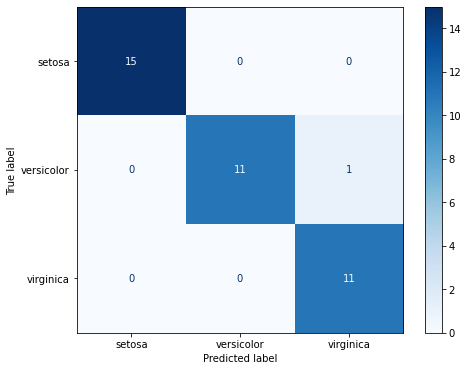

In [8]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=iris['target_names'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

## Save Model

In [9]:
with open('model.pickle', 'wb') as f:
    pickle.dump(clf, f)